# User defined Loader

In [1]:
import pystare
import starepandas

import geopandas
import numpy

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
DEFAULT_DPI = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = 1.5 * DEFAULT_DPI
mpl.rcParams['legend.fontsize'] = 6

In [3]:
import starepandas.io.granules.modis

class ModXX(starepandas.io.granules.modis.Modis):

    def __init__(self, file_path, sidecar_path=None):
        super(ModXX, self).__init__(file_path, sidecar_path)
        self.nom_res = '5km'

    def read_data(self):
        dataset_names = ['Scan_Start_Time', 'Solar_Zenith', 'Solar_Azimuth',
                         'Sensor_Zenith', 'Sensor_Azimuth', 'Water_Vapor_Infrared']

        dataset_names2 = ['Cloud_Mask_QA', 'Water_Vapor_Near_Infrared',
                          'Water_Vaport_Corretion_Factors', 'Quality_Assurance_Near_Infrared', 'Quality_Assurance_Infrared']
        for dataset_name in dataset_names:
            self.data[dataset_name] = self.hdf.select(dataset_name).get()
            
starepandas.io.granules.granule_factory_library['MODXX']=ModXX

starepandas.io.granules.granule_factory_library

{'MOD09GA|MYD09GA': starepandas.io.granules.modis.Mod09GA,
 'MOD05|MYD05': starepandas.io.granules.modis.Mod05,
 'MOD03|MYD03': starepandas.io.granules.modis.Mod03,
 'MOD09|MYD09': starepandas.io.granules.modis.Mod09,
 'VNP02DNB|VJ102DNB': starepandas.io.granules.viirsl2.VNP02DNB,
 'VNP03DNB|VJ103DNB': starepandas.io.granules.viirsl2.VNP03DNB,
 'VNP03MOD|VJ103MOD': starepandas.io.granules.viirsl2.VNP03MOD,
 'VNP03IMG|VJ103IMG': starepandas.io.granules.viirsl2.VNP03IMG,
 'VNP09': starepandas.io.granules.viirsl2.VNP09,
 'CLDMSKL2VIIRS': starepandas.io.granules.viirsl2.CLDMSKL2VIIRS,
 'SSMIS': starepandas.io.granules.ssmis.SSMIS,
 'ATMS': starepandas.io.granules.atms.ATMS,
 'MODXX': __main__.ModXX}

In [4]:
mod=None

In [5]:
granule_name="s3://eis-dh-fire/mod14/raw/MOD14.A2020214.0520.061.2020340090643.hdf"

In [6]:
granule_name="../starepandas//datasets/MODXX.hdf"

In [7]:
mod = starepandas.read_granule(granule_name, sidecar=False, latlon=False, add_stare=True)

In [8]:
mod = starepandas.read_granule(granule_name, sidecar=True, latlon=True)

In [9]:
mod['stare_hex']=mod['sids'].apply(hex)

In [10]:
mod['wiv0']=mod['Water_Vapor_Infrared'].apply(lambda x: min(0,x))

In [11]:
mod['pod']=mod['sids'].apply(lambda sid: pystare.spatial_clear_to_resolution(pystare.spatial_coerce_resolution(sid,7)))

In [12]:
mod['pod_hex']=mod['pod'].apply(lambda sid: hex(sid))

In [13]:
mod

,lat,lon,sids,Scan_Start_Time,Solar_Zenith,Solar_Azimuth,Sensor_Zenith,Sensor_Azimuth,Water_Vapor_Infrared,stare_hex,wiv0,pod,pod_hex
0,53.201778,-15.933996,4298473764500464809,8.493984e+08,14709,-2296,6534,-8952,-9999,0x3ba73f1d5162e4a9,-9999,4298439553720516615,0x3ba7200000000007
1,53.203171,-16.288101,4298458168380511209,8.493984e+08,14700,-2354,6472,-8980,-9999,0x3ba730ee103253e9,-9999,4298439553720516615,0x3ba7200000000007
2,53.203518,-16.629105,4297394569014717897,8.493984e+08,14692,-2410,6411,-9008,-9999,0x3ba3699789d0adc9,-9999,4297384022557851655,0x3ba3600000000007
3,53.202934,-16.957928,4297300698872999369,8.493984e+08,14684,-2464,6351,-9034,-9999,0x3ba31437b15cedc9,-9999,4297278469441585159,0x3ba3000000000007
4,53.201508,-17.275316,4297290857922121161,8.493984e+08,14676,-2516,6291,-9059,-9999,0x3ba30b446afb4dc9,-9999,4297278469441585159,0x3ba3000000000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109615,64.084297,-66.281410,3727686638370615689,8.493987e+08,12157,-7468,6223,4800,-9999,0x33bb673f5a0cf189,-9999,3727678669695483911,0x33bb600000000007
109616,63.960953,-66.591354,3727661374545790857,8.493987e+08,12147,-7505,6282,4772,-9999,0x33bb504528bf0789,-9999,3727643485323395079,0x33bb400000000007
109617,63.831799,-66.911255,3727838256925064969,8.493987e+08,12137,-7544,6342,4743,-9999,0x33bbf124cc213f09,-9999,3727819407183839239,0x33bbe00000000007
109618,63.698635,-67.236229,3727843063731949801,8.493987e+08,12126,-7583,6402,4714,-9999,0x33bbf583f82590e9,-9999,3727819407183839239,0x33bbe00000000007


In [14]:
granule_name="../starepandas/datasets/MOD05_L2.A2019336.0000.061.2019336211522.hdf"

In [15]:
mod = starepandas.read_granule(granule_name, sidecar=True, latlon=True)

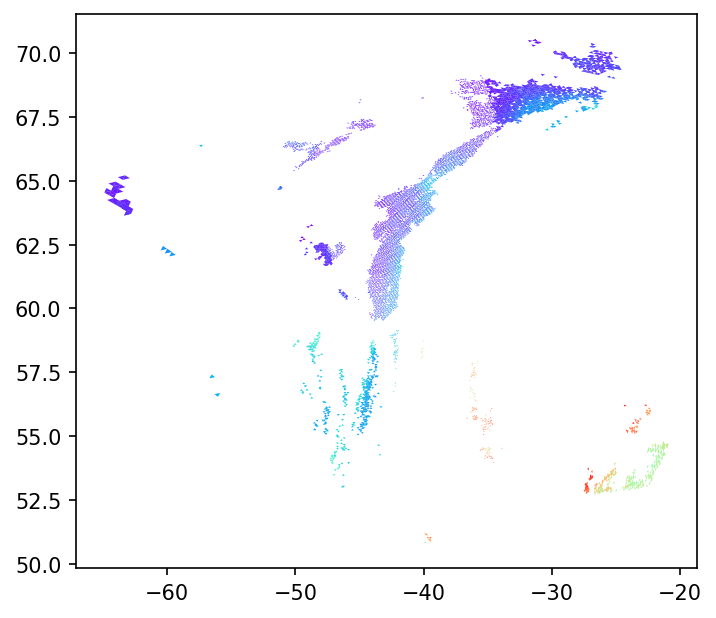

In [16]:
ax = plt.axes()
mod.set_trixels(mod.make_trixels(), inplace=True)
mod.plot(ax=ax, trixels=True
         ,boundary=False, column='Water_Vapor_Infrared', linewidth=0.2
         ,cmap='rainbow')

del ax

In [17]:
from starepandas.io.granules.viirsl2 import VIIRSL2

class VNP03IMG(VIIRSL2):

    def __init__(self, file_path, sidecar_path=None):
        super(VNP03IMG,self).__init__(file_path, sidecar_path)

    def read_data(self):
        """                                                                                                                                                                    
        reads the data from a VNP03IMG granule into the self.data dictionary.                                                                                                  
        Two variables are read:                                                                                                                                              
                                                                                                                                                                               
        a) land_water_mask                                                                                                                                                     
        1: Shallow_Ocean 2: Land 3: Coastline 4: Shallow_Inland 5: Ephemeral 6: Deep_Inland 7: Continental 8: Deep_Ocean                                                       
        b) quality_flag                                                                                                                                                        
        1: Input_invalid 2: Pointing_bad 3: Terrain_bad                                                                                                                        
        :return:                                                                                                                                                               
        """

        group = self.netcdf.groups['geolocation_data']
        self.data['land_water_mask'] = group['land_water_mask'][:].data
        self.data['quality_flag'] = group['quality_flag'][:].data


class VNP02IMG(VIIRSL2):

    def __init__(self, file_path, sidecar_path=None):
        super(VNP02IMG, self).__init__(file_path, sidecar_path)
        self.companion_prefix = 'VNP03IMG'

    def read_data(self):
        for band in ['I04','I05']:
            IMG = self.netcdf.groups['observation_data'][band][:].data
            quality_flags = self.netcdf.groups['observation_data'][band+'_quality_flags'][:].data
            
            # TODO Do we need to allocate these first?
            #
            self.data[band+'_observations']  = IMG
            self.data[band+'_quality_flags'] = quality_flags

    def latlon(self):
        pass

    def read_sidecar_cover(self, sidecar_path=None):
        pass

    def read_sidecar_index(self, sidecar_path=None):
        pass

starepandas.io.granules.granule_factory_library['VNP02IMG']=VNP02IMG
starepandas.io.granules.granule_factory_library['VNP03IMG']=VNP03IMG

starepandas.io.granules.granule_factory_library

{'MOD09GA|MYD09GA': starepandas.io.granules.modis.Mod09GA,
 'MOD05|MYD05': starepandas.io.granules.modis.Mod05,
 'MOD03|MYD03': starepandas.io.granules.modis.Mod03,
 'MOD09|MYD09': starepandas.io.granules.modis.Mod09,
 'VNP02DNB|VJ102DNB': starepandas.io.granules.viirsl2.VNP02DNB,
 'VNP03DNB|VJ103DNB': starepandas.io.granules.viirsl2.VNP03DNB,
 'VNP03MOD|VJ103MOD': starepandas.io.granules.viirsl2.VNP03MOD,
 'VNP03IMG|VJ103IMG': starepandas.io.granules.viirsl2.VNP03IMG,
 'VNP09': starepandas.io.granules.viirsl2.VNP09,
 'CLDMSKL2VIIRS': starepandas.io.granules.viirsl2.CLDMSKL2VIIRS,
 'SSMIS': starepandas.io.granules.ssmis.SSMIS,
 'ATMS': starepandas.io.granules.atms.ATMS,
 'MODXX': __main__.ModXX,
 'VNP02IMG': __main__.VNP02IMG,
 'VNP03IMG': __main__.VNP03IMG}

In [18]:
granule_name = "../tests/data/granules/viirs/VNP03DNB.A2022308.1930.002.2022309041547.nc"

In [19]:
%env OMP_NUM_THREADS=8
%env OMP_NUM_THREADS

env: OMP_NUM_THREADS=8


'8'

In [20]:
%env OMP_NUM_THREADS=4
vnp=None
del vnp
%time vnp = starepandas.read_granule(granule_name, sidecar=True, latlon=True)

env: OMP_NUM_THREADS=4
CPU times: user 1.79 s, sys: 2.02 s, total: 3.82 s
Wall time: 4.14 s


# Creating PODs

In [21]:
vnp = vnp[0:100_000]

In [22]:
vnp['stare_hex']=vnp['sids'].apply(hex)

In [23]:
vnp['pod']=vnp['sids'].apply(lambda sid: pystare.spatial_clear_to_resolution(pystare.spatial_coerce_resolution(sid, 7)))

In [24]:
vnp['pod_hex']=vnp['pod'].apply(lambda sid: hex(sid))